In [58]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime 

## UCDP GED DATA
UCDP Georeferenced Event Dataset (GED) Global version 17.1 (2016)
from http://ucdp.uu.se/downloads/ 

In [3]:
ged_df = pd.read_excel('ged171.xlsx', header=0)

In [25]:
ukraine_ged_df = ged_df[ged_df['country']=='Ukraine']
cols_to_keep = ['dyad_name','date_start','date_end','deaths_a','deaths_b','deaths_civilians','deaths_unknown']
ukraine_ged_df = ukraine_ged_df[cols_to_keep]

#convert stinr to date
ukraine_ged_df['date_start'] = pd.to_datetime(ukraine_ged_df['date_start'])
# adding ukraine death all column
ukraine_ged_df['deaths all'] = ukraine_ged_df['deaths_a']+ukraine_ged_df['deaths_b']+ukraine_ged_df['deaths_civilians']+ukraine_ged_df['deaths_unknown']

In [50]:
ged_df.columns

Index(['id', 'year', 'active_year', 'type_of_violence', 'conflict_new_id',
       'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id', 'gwnoa',
       'side_a', 'side_b_new_id', 'gwnob', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates', 'adm_1', 'adm_2',
       'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'low', 'high'],
      dtype='object')

In [134]:
ukraine_ged_df.head()

,dyad_name,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,deaths all
85031,Government of Ukraine - Maidan,2014-01-22,2014-01-22,0,5,0,0,5
85126,Government of Ukraine - Maidan,2014-01-27,2014-01-27,0,0,0,1,1
85140,Government of Ukraine - Maidan,2014-02-18,2014-02-18,10,4,0,12,26
85141,Government of Ukraine - Maidan,2014-02-18,2014-02-20,0,0,0,2,2
85142,Government of Ukraine - Maidan,2014-02-20,2014-02-20,2,46,0,0,48


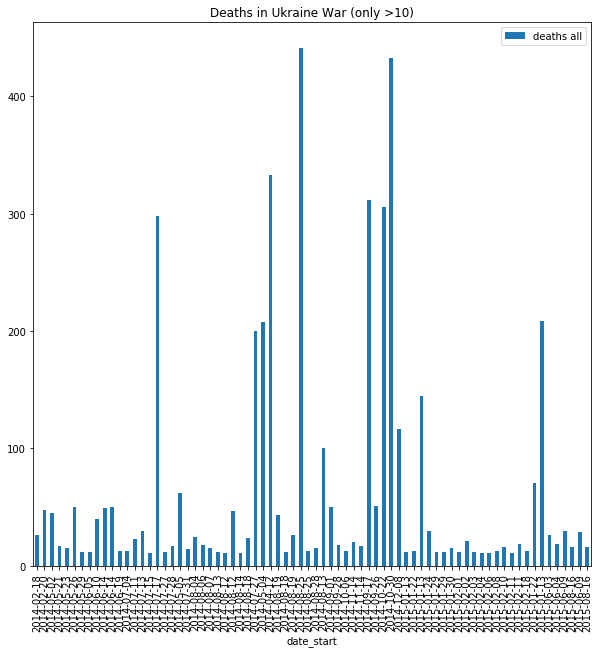

In [135]:
# Lets see how many deaths they did 
# We can see this plot is ~~ not that good, Lets aggregate it
plt.rcParams['figure.figsize'] = (10,10)
plt.figure(); ukraine_df_toplot.plot(kind='bar');
plt.xticks(rotation=90)
plt.title('Deaths in Ukraine War (only >10)')
plt.show()

/Users/patryk/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


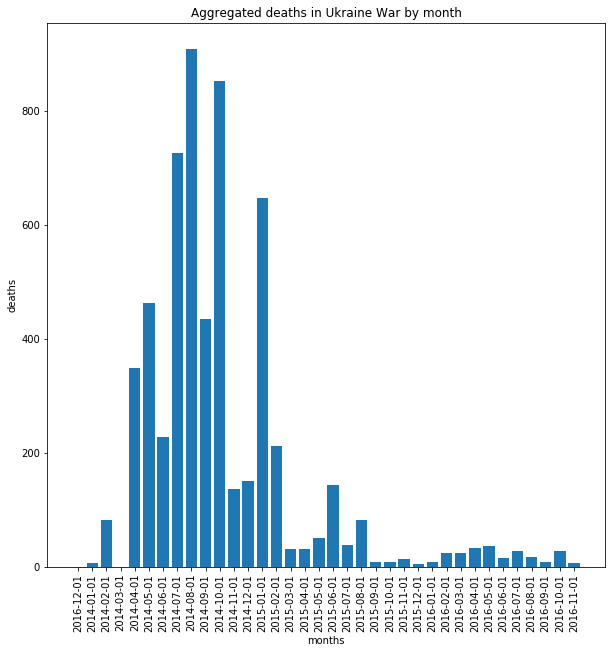

In [130]:
# Calculating agregated deaths per month 
deaths_aggregated = np.zeros([36,1])
dates = []
date_last = datetime.date(year=2013,month=11,day=1)
for y in range(2014,2017):
    for m in range(1,13):
        dates.append(str(date_current))
        date_current = datetime.date(year=y,month=m,day=1)
        deaths_month = np.sum(ukraine_ged_df[ ukraine_ged_df['date_start'] > date_last][ ukraine_ged_df['date_start'] < date_current]['deaths all'])
        deaths_aggregated[-1+m+(y-2014)*12]=deaths_month
        date_last = date_current
        
dates = np.array(dates)

plt.rcParams['figure.figsize'] = (10,10)
plt.bar(range(0,36), np.squeeze(deaths_aggregated))
plt.xticks(range(0,36), dates, rotation=90)
plt.title('Aggregated deaths in Ukraine War by month')
plt.ylabel('deaths')
plt.xlabel('months')
plt.show()